# Importing Libraries

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data = pd.read_csv(r'C:\Users\faroo\Desktop\Campus_placemne_prediction\Placement_Data.csv')


# Getting Dataset

In [3]:
data

,sl_no,gender,ssc_p,ssc_b,puc_p,puc_b,puc,degree_p,Branch,workex,etest_p,specialisation,gate_p,status,salary
0,1,M,67.00,Others,91.00,rgukt,mpc,58.00,cse,No,55.0,ml,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,rgukt,mbipc,77.48,cse,Yes,86.5,web,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,rgukt,mbipc,64.00,cse,No,75.0,web,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,rgukt,mbipc,52.00,cse,No,66.0,ml,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,rgukt,mbipc,73.30,cse,No,96.8,ml,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,rgukt,mpc,77.60,cse,No,91.0,ml,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,rgukt,mpc,72.00,cse,No,74.0,web,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,rgukt,mbipc,73.00,cse,Yes,59.0,ml,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,rgukt,mbipc,58.00,cse,No,70.0,web,60.23,Placed,204000.0


In [4]:
import warnings

In [5]:
warnings.filterwarnings('ignore')

### 1. Display Top 5 Rows of The Dataset

In [6]:
data.head()

,sl_no,gender,ssc_p,ssc_b,puc_p,puc_b,puc,degree_p,Branch,workex,etest_p,specialisation,gate_p,status,salary
0,1,M,67.00,Others,91.00,rgukt,mpc,58.00,cse,No,55.0,ml,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,rgukt,mbipc,77.48,cse,Yes,86.5,web,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,rgukt,mbipc,64.00,cse,No,75.0,web,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,rgukt,mbipc,52.00,cse,No,66.0,ml,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,rgukt,mbipc,73.30,cse,No,96.8,ml,55.50,Placed,425000.0


### 2. Check Last 5 Rows of The Dataset

In [7]:
data.tail()

,sl_no,gender,ssc_p,ssc_b,puc_p,puc_b,puc,degree_p,Branch,workex,etest_p,specialisation,gate_p,status,salary
210,211,M,80.6,Others,82.0,rgukt,mpc,77.6,cse,No,91.0,ml,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,rgukt,mpc,72.0,cse,No,74.0,web,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,rgukt,mbipc,73.0,cse,Yes,59.0,ml,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,rgukt,mbipc,58.0,cse,No,70.0,web,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,rgukt,mbipc,53.0,cse,No,89.0,web,60.22,Not Placed,NaN


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [8]:
data.shape

(215, 15)

In [9]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 215
Number of Columns 15


### 4. Get Information About Our Dataset Like the Total Number of Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   puc_p           215 non-null    float64
 5   puc_b           215 non-null    object 
 6   puc             215 non-null    object 
 7   degree_p        215 non-null    float64
 8   Branch          215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  gate_p          215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


### 5. Check Null Values In The Dataset

In [11]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
puc_p              0
puc_b              0
puc                0
degree_p           0
Branch             0
workex             0
etest_p            0
specialisation     0
gate_p             0
status             0
salary            67
dtype: int64

### 6. Get Overall Statistics About The Dataset

In [12]:
data.describe()

,sl_no,ssc_p,puc_p,degree_p,etest_p,gate_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### 7. EDA

In [13]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'puc_p', 'puc_b', 'puc',
       'degree_p', 'Branch', 'workex', 'etest_p', 'specialisation', 'gate_p',
       'status', 'salary'],
      dtype='object')

#### How Many Students Got Placed?

In [14]:
data['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [15]:
data['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

#### Could you display the top 5 sci&tech students placed according to their salary?

In [16]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'puc_p', 'puc_b', 'puc',
       'degree_p', 'Branch', 'workex', 'etest_p', 'specialisation', 'gate_p',
       'status', 'salary'],
      dtype='object')

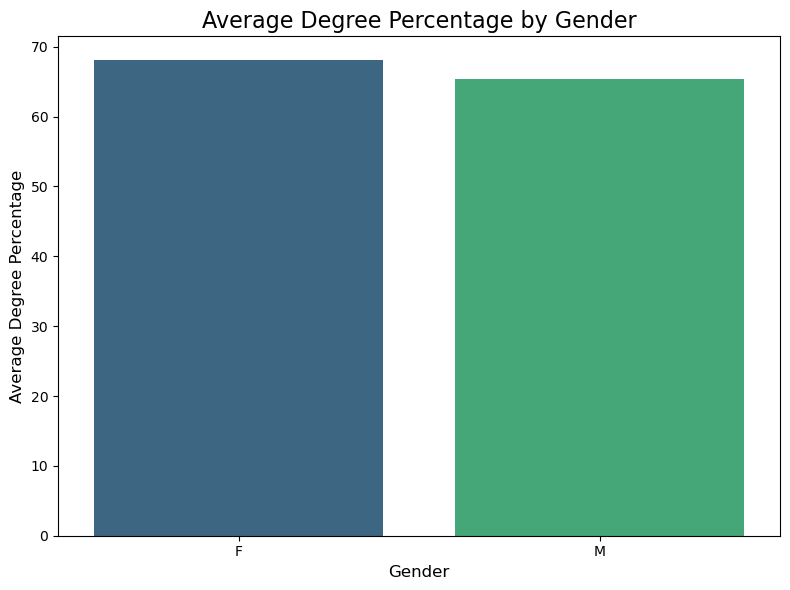

,gender,degree_p
0,F,68.090000
1,M,65.429856


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by gender and calculate the mean degree percentage
gender_degree = data.groupby('gender')['degree_p'].mean().reset_index()

# Plot the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='degree_p', data=gender_degree, palette='viridis')

# Add titles and labels
plt.title('Average Degree Percentage by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Degree Percentage', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Display the data
gender_degree


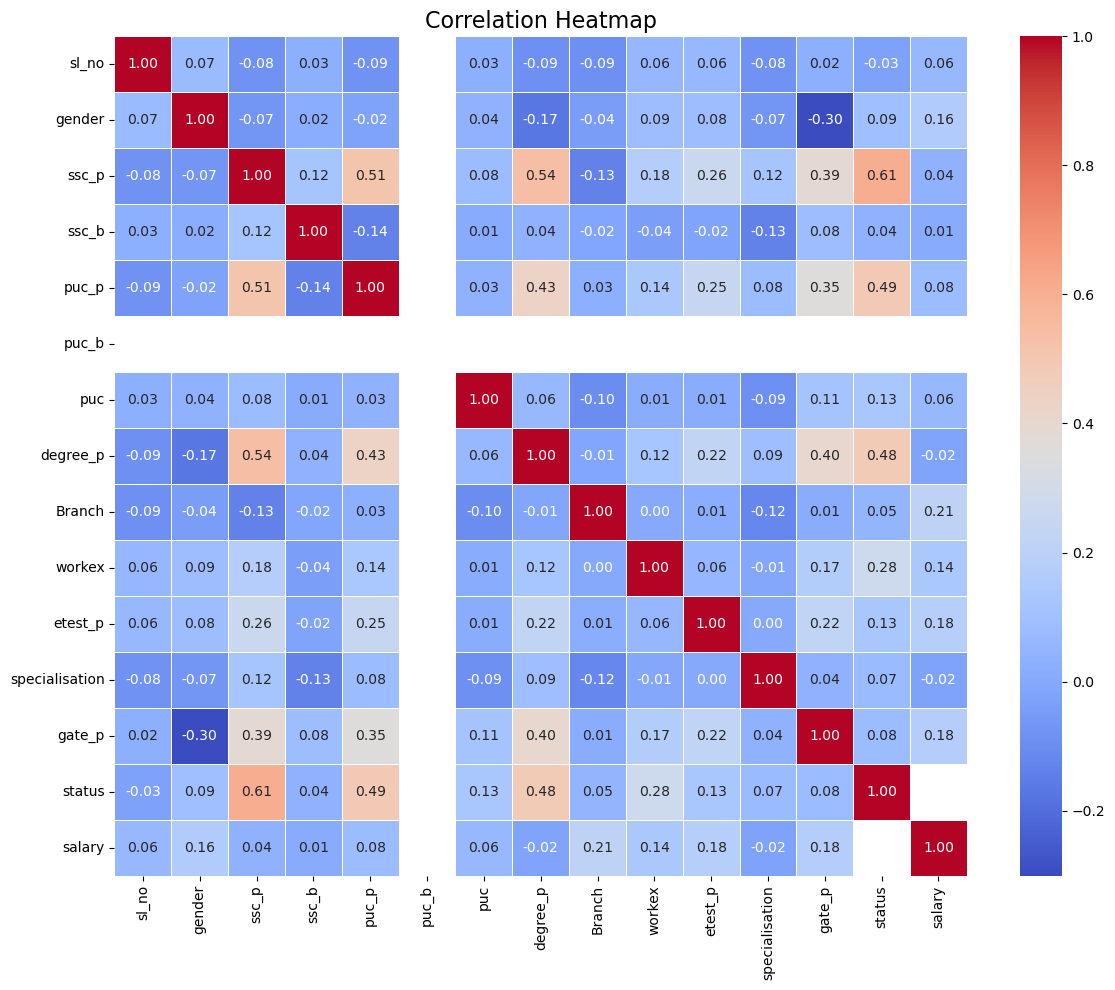

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for the heatmap
columns = ['sl_no', 'gender', 'ssc_p', 'ssc_b', 'puc_p', 'puc_b', 'puc', 'degree_p', 
           'Branch', 'workex', 'etest_p', 'specialisation', 'gate_p', 'status', 'salary']

# Create a copy of the dataset with only selected columns
heatmap_data = data[columns].copy()

# Encode categorical columns numerically
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in heatmap_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    heatmap_data[col] = le.fit_transform(heatmap_data[col])
    label_encoders[col] = le

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)

# Add title
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()


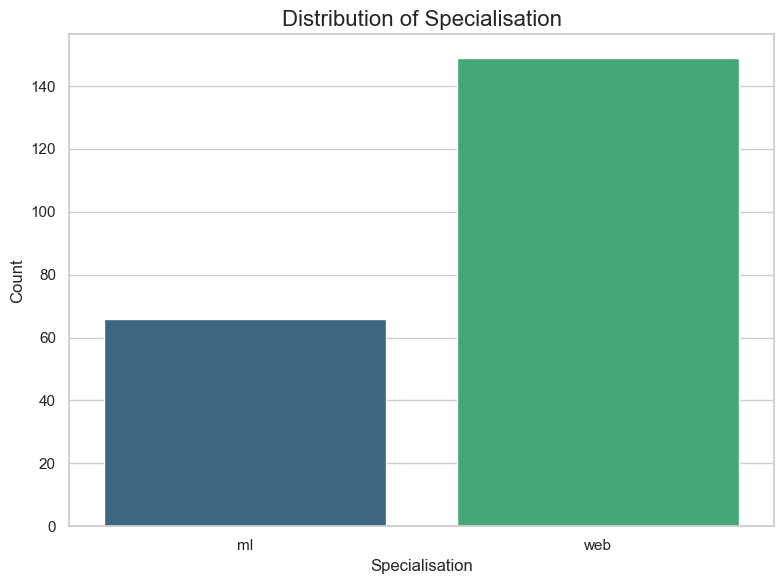

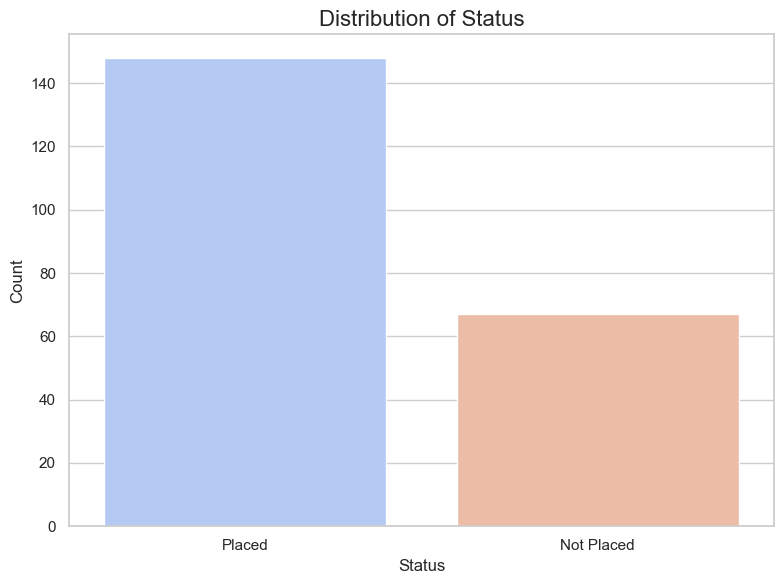

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot histogram for 'specialisation'
plt.figure(figsize=(8, 6))
sns.countplot(x='specialisation', data=data, palette='viridis')
plt.title('Distribution of Specialisation', fontsize=16)
plt.xlabel('Specialisation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

# Plot histogram for 'status'
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=data, palette='coolwarm')
plt.title('Distribution of Status', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


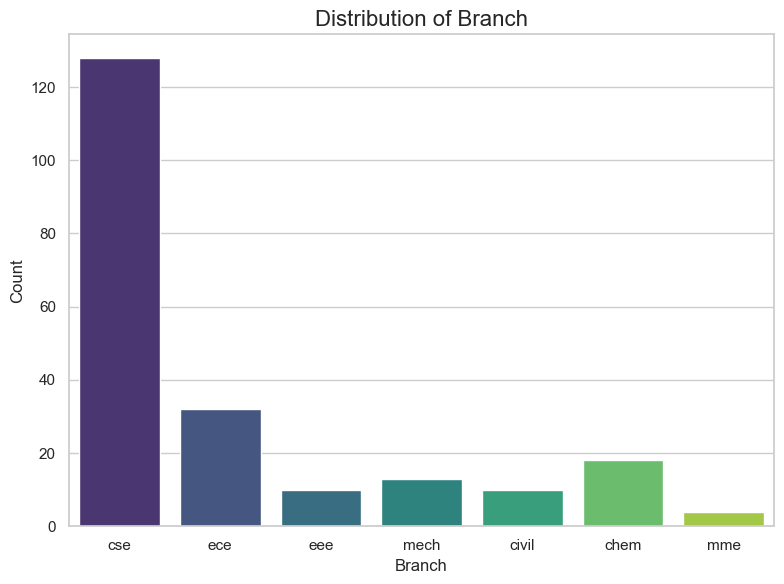

Text(0.5, 1.0, 'Distribution of Work Experience')

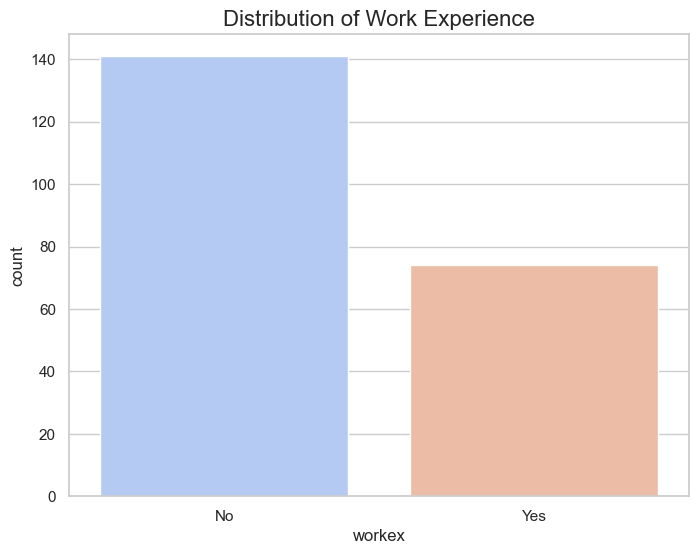

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot bar chart for 'Branch'
plt.figure(figsize=(8, 6))
sns.countplot(x='Branch', data=data, palette='viridis')
plt.title('Distribution of Branch', fontsize=16)
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

# Plot bar chart for 'workex'
plt.figure(figsize=(8, 6))
sns.countplot(x='workex', data=data, palette='coolwarm')
plt.title('Distribution of Work Experience', fontsize=16)


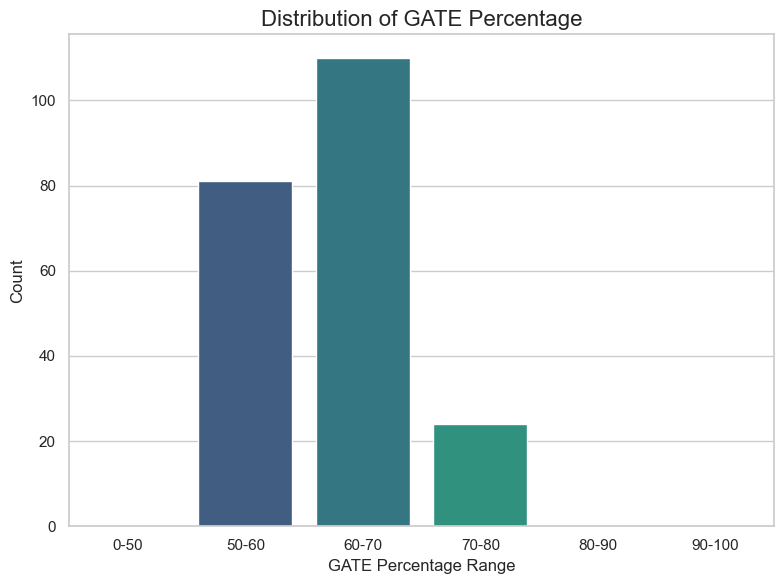

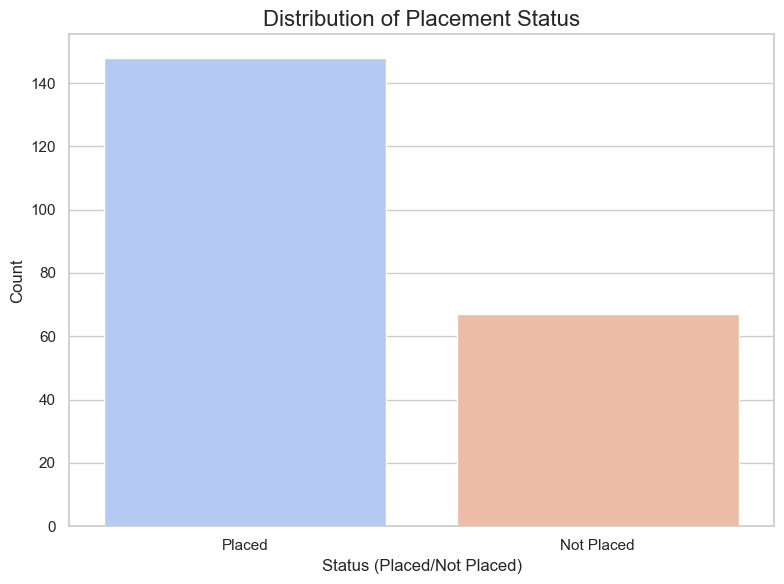

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set plot style
sns.set(style="whitegrid")

# Categorize 'gate_p' into bins
bins = [0, 50, 60, 70, 80, 90, 100]
labels = ['0-50', '50-60', '60-70', '70-80', '80-90', '90-100']
data['gate_p_bins'] = pd.cut(data['gate_p'], bins=bins, labels=labels)

# Plot bar graph for 'gate_p_bins'
plt.figure(figsize=(8, 6))
sns.countplot(x='gate_p_bins', data=data, palette='viridis')
plt.title('Distribution of GATE Percentage', fontsize=16)
plt.xlabel('GATE Percentage Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

# Plot bar graph for 'status'
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=data, palette='coolwarm')
plt.title('Distribution of Placement Status', fontsize=16)
plt.xlabel('Status (Placed/Not Placed)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


In [22]:
data[(data['Branch']=="cse") & (data['status']=="Placed")].sort_values(by="salary",ascending=False).head()

,sl_no,gender,ssc_p,ssc_b,puc_p,puc_b,puc,degree_p,Branch,workex,etest_p,specialisation,gate_p,status,salary,gate_p_bins
177,178,F,73.00,Central,97.00,rgukt,mpc,79.00,cse,Yes,89.0,web,70.81,Placed,650000.0,70-80
174,175,M,73.24,Others,50.83,rgukt,mpc,64.27,cse,Yes,64.0,ml,66.23,Placed,500000.0,60-70
163,164,M,63.00,Others,67.00,rgukt,mpc,64.00,cse,No,75.0,ml,66.46,Placed,500000.0,60-70
53,54,M,80.00,Others,70.00,rgukt,mpc,72.00,cse,No,87.0,web,71.04,Placed,450000.0,70-80
4,5,M,85.80,Central,73.60,rgukt,mbipc,73.30,cse,No,96.8,ml,55.50,Placed,425000.0,50-60


### 8. Data Preprocessing

In [23]:
data.head()

,sl_no,gender,ssc_p,ssc_b,puc_p,puc_b,puc,degree_p,Branch,workex,etest_p,specialisation,gate_p,status,salary,gate_p_bins
0,1,M,67.00,Others,91.00,rgukt,mpc,58.00,cse,No,55.0,ml,58.80,Placed,270000.0,50-60
1,2,M,79.33,Central,78.33,rgukt,mbipc,77.48,cse,Yes,86.5,web,66.28,Placed,200000.0,60-70
2,3,M,65.00,Central,68.00,rgukt,mbipc,64.00,cse,No,75.0,web,57.80,Placed,250000.0,50-60
3,4,M,56.00,Central,52.00,rgukt,mbipc,52.00,cse,No,66.0,ml,59.43,Not Placed,NaN,50-60
4,5,M,85.80,Central,73.60,rgukt,mbipc,73.30,cse,No,96.8,ml,55.50,Placed,425000.0,50-60


In [24]:
data = data.drop(['sl_no','salary'],axis=1)

In [25]:
data.head(1)

,gender,ssc_p,ssc_b,puc_p,puc_b,puc,degree_p,Branch,workex,etest_p,specialisation,gate_p,status,gate_p_bins
0,M,67.0,Others,91.0,rgukt,mpc,58.0,cse,No,55.0,ml,58.8,Placed,50-60


#### Encoding the Categorical Columns

In [26]:
data['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [27]:
data['ssc_b'] = data['ssc_b'].map({'Central':1,'Others':0})

In [28]:
data.head(2)

,gender,ssc_p,ssc_b,puc_p,puc_b,puc,degree_p,Branch,workex,etest_p,specialisation,gate_p,status,gate_p_bins
0,M,67.00,0,91.00,rgukt,mpc,58.00,cse,No,55.0,ml,58.80,Placed,50-60
1,M,79.33,1,78.33,rgukt,mbipc,77.48,cse,Yes,86.5,web,66.28,Placed,60-70


In [29]:
data['puc_b'].unique()

array(['rgukt'], dtype=object)

In [30]:
data['puc_b'] = data['puc_b'].map({'rgukt':1})

In [31]:
data.head(2)

,gender,ssc_p,ssc_b,puc_p,puc_b,puc,degree_p,Branch,workex,etest_p,specialisation,gate_p,status,gate_p_bins
0,M,67.00,0,91.00,1,mpc,58.00,cse,No,55.0,ml,58.80,Placed,50-60
1,M,79.33,1,78.33,1,mbipc,77.48,cse,Yes,86.5,web,66.28,Placed,60-70


In [32]:
data['puc'].unique()

array(['mpc', 'mbipc'], dtype=object)

In [33]:
data['puc'] = data['puc'].map({'mpc':0,'mbipc':1})

In [34]:
data.head()

,gender,ssc_p,ssc_b,puc_p,puc_b,puc,degree_p,Branch,workex,etest_p,specialisation,gate_p,status,gate_p_bins
0,M,67.00,0,91.00,1,0,58.00,cse,No,55.0,ml,58.80,Placed,50-60
1,M,79.33,1,78.33,1,1,77.48,cse,Yes,86.5,web,66.28,Placed,60-70
2,M,65.00,1,68.00,1,1,64.00,cse,No,75.0,web,57.80,Placed,50-60
3,M,56.00,1,52.00,1,1,52.00,cse,No,66.0,ml,59.43,Not Placed,50-60
4,M,85.80,1,73.60,1,1,73.30,cse,No,96.8,ml,55.50,Placed,50-60


In [35]:
data['Branch'].unique()

array(['cse', 'ece', 'eee', 'mech', 'civil', 'chem', 'mme'], dtype=object)

In [36]:
data['Branch'] = data['Branch'].map({'cse':0,'ece':1,'eee':2,'mech':3,'civil':4,'chem':5,'mme':6})

In [37]:
data.head(2)

,gender,ssc_p,ssc_b,puc_p,puc_b,puc,degree_p,Branch,workex,etest_p,specialisation,gate_p,status,gate_p_bins
0,M,67.00,0,91.00,1,0,58.00,0,No,55.0,ml,58.80,Placed,50-60
1,M,79.33,1,78.33,1,1,77.48,0,Yes,86.5,web,66.28,Placed,60-70


In [38]:
data['specialisation'].unique()

array(['ml', 'web'], dtype=object)

In [39]:
data['specialisation'] =data['specialisation'].map({'web':1,'ml':0})

In [40]:
data.head(2)

,gender,ssc_p,ssc_b,puc_p,puc_b,puc,degree_p,Branch,workex,etest_p,specialisation,gate_p,status,gate_p_bins
0,M,67.00,0,91.00,1,0,58.00,0,No,55.0,0,58.80,Placed,50-60
1,M,79.33,1,78.33,1,1,77.48,0,Yes,86.5,1,66.28,Placed,60-70


In [41]:
data['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [42]:
data['workex'] = data['workex'].map({'Yes':1,'No':0})

In [43]:
data.head(2)

,gender,ssc_p,ssc_b,puc_p,puc_b,puc,degree_p,Branch,workex,etest_p,specialisation,gate_p,status,gate_p_bins
0,M,67.00,0,91.00,1,0,58.00,0,0,55.0,0,58.80,Placed,50-60
1,M,79.33,1,78.33,1,1,77.48,0,1,86.5,1,66.28,Placed,60-70


In [44]:
data['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [45]:
data['status'] = data['status'].map({'Placed':1,'Not Placed':0})

In [46]:
data.head()

,gender,ssc_p,ssc_b,puc_p,puc_b,puc,degree_p,Branch,workex,etest_p,specialisation,gate_p,status,gate_p_bins
0,M,67.00,0,91.00,1,0,58.00,0,0,55.0,0,58.80,1,50-60
1,M,79.33,1,78.33,1,1,77.48,0,1,86.5,1,66.28,1,60-70
2,M,65.00,1,68.00,1,1,64.00,0,0,75.0,1,57.80,1,50-60
3,M,56.00,1,52.00,1,1,52.00,0,0,66.0,0,59.43,0,50-60
4,M,85.80,1,73.60,1,1,73.30,0,0,96.8,0,55.50,1,50-60


In [47]:
data['gender'] = data['gender'].map({'M': 1, 'F': 0})


In [48]:
data.head()

,gender,ssc_p,ssc_b,puc_p,puc_b,puc,degree_p,Branch,workex,etest_p,specialisation,gate_p,status,gate_p_bins
0,1,67.00,0,91.00,1,0,58.00,0,0,55.0,0,58.80,1,50-60
1,1,79.33,1,78.33,1,1,77.48,0,1,86.5,1,66.28,1,60-70
2,1,65.00,1,68.00,1,1,64.00,0,0,75.0,1,57.80,1,50-60
3,1,56.00,1,52.00,1,1,52.00,0,0,66.0,0,59.43,0,50-60
4,1,85.80,1,73.60,1,1,73.30,0,0,96.8,0,55.50,1,50-60


### 9. Store Feature Matrix In X and Response(Target) In Vector y

In [49]:
data.columns

Index(['gender', 'ssc_p', 'ssc_b', 'puc_p', 'puc_b', 'puc', 'degree_p',
       'Branch', 'workex', 'etest_p', 'specialisation', 'gate_p', 'status',
       'gate_p_bins'],
      dtype='object')

In [50]:


X = data.drop('status',axis=1)
y= data['status']

In [51]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int64

### 10. Splitting The Dataset Into The Training Set And Test Set

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

### 11. Import The models

In [56]:
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn import svm
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import GradientBoostingClassifier

### 12. Model Training

In [57]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

svm = svm.SVC()
svm.fit(X_train,y_train)

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

rf=RandomForestClassifier()
rf.fit(X_train,y_train)

gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

ValueError: could not convert string to float: '50-60'

### 13. Prediction on Test Data

In [67]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = knn.predict(X_test)
y_pred4 = dt.predict(X_test)
y_pred5 = rf.predict(X_test)
y_pred6 = gb.predict(X_test)

### 14. Evaluating the Algorithms

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
score1=accuracy_score(y_test,y_pred1)
score2=accuracy_score(y_test,y_pred2)
score3=accuracy_score(y_test,y_pred3)
score4=accuracy_score(y_test,y_pred4)
score5=accuracy_score(y_test,y_pred5)
score6=accuracy_score(y_test,y_pred6)

In [70]:
print(score1,score2,score3,score4,score5,score6)

0.8604651162790697 0.7674418604651163 0.7906976744186046 0.7906976744186046 0.7674418604651163 0.813953488372093


In [71]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],
            'ACC':[score1*100,
                  score2*100,
                  score3*100,
                  score4*100,
                  score5*100,score6*100]})

In [72]:
final_data

,Models,ACC
0,LR,86.046512
1,SVC,76.744186
2,KNN,79.069767
3,DT,79.069767
4,RF,76.744186
5,GB,81.395349


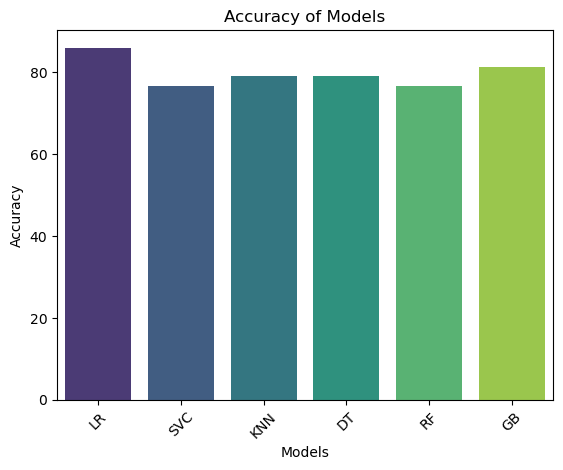

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='Models', y='ACC', data=final_data, palette='viridis')
plt.title('Accuracy of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


### 15. Prediction on New Data

In [74]:
new_data = pd.DataFrame({
    'gender':0,
    'ssc_p':67.0,
    'ssc_b':0,
    'puc_p':91.0,
    'puc_b':0,
    'puc':1,
    'degree_p':58.0,
    'Branch':2,
    'workex':0,
    'etest_p':55.0,
     'specialisation':1,
    'gate_p':58.8,   
},index=[0])

In [75]:
lr= LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [76]:
p=lr.predict(new_data)
prob=lr.predict_proba(new_data)
if p==1:
    print('Placed')
    print(f"You will be placed with probability of {prob[0][1]:.2f}")
else:
    print("Not-placed")

Placed
You will be placed with probability of 1.00


In [77]:
prob

array([[0.00428224, 0.99571776]])

### 16. Save Model Using Joblib

In [78]:
import joblib

In [79]:
joblib.dump(lr,'model_campus_placement')

['model_campus_placement']

In [80]:
model = joblib.load('model_campus_placement')

In [81]:


model.predict(new_data)

array([1], dtype=int64)

### GUI

In [82]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *
import tkinter.font as font
import pandas as pd

def show_entry_fields():
    text = clicked.get()
    if text == "Male":
        p1 = 1
    else:
        p1 = 0

    p2 = float(e2.get())
    
    text = clicked1.get()
    if text == "central":
        p3 = 1
    else:
        p3 = 0

    p4 = float(e4.get())

    text = clicked6.get()
    if text == "rgukt":
        p5 = 1
    else:
        p5 = 0

    text = clicked2.get()
    if text == "mpc":
        p6 = 2
    elif text == "mbipc":
        p6 = 1
    else:
        p6 = 0

    p7 = float(e7.get())

    text = clicked3.get()
    branches = {"cse": 6, "ece": 5, "eee": 4, "mech": 3, "chem": 2, "mme": 1, "civil": 0}
    p8 = branches.get(text, 0)

    text = clicked4.get()
    if text == "Yes":
        p9 = 1
    else:
        p9 = 0

    p10 = float(e10.get())

    text = clicked5.get()
    specialisations = {"web": 1, "ml": 0}
    p11 = specialisations.get(text, 0)

    p12 = float(e12.get())

    model = joblib.load('model_campus_placement')
    new_data = pd.DataFrame({
        'gender': p1,
        'ssc_p': p2,
        'ssc_b': p3,
        'puc_p': p4,
        'puc_b': p5,
        'puc': p6,
        'degree_p': p7,
        'Branch': p8,
        'workex': p9,
        'etest_p': p10,
        'specialisation': p11,
        'gate_p': p12,   
    }, index=[0])

    result = model.predict(new_data)
    result1 = model.predict_proba(new_data)

    if result[0] == 0:
        Label(master, text="Can't Be Placed").grid(row=31)
    else:
        Label(master, text="Student Will Be Placed With Probability of", font=("Arial", 15)).grid(row=31)
        Label(master, text=round(result1[0][1], 2) * 100, font=("Arial", 15)).grid(row=33)
        Label(master, text="Percent", font=("Arial", 15)).grid(row=34)

master = Tk()
master.title("Campus Placement Prediction System")

label = Label(master, text="Campus Placement Prediction System", bg="green", fg="white", font=("Arial", 20)).grid(row=0, columnspan=2)

Label(master, text="Gender", font=("Arial", 15)).grid(row=1)
Label(master, text="Secondary Education percentage - 10th Grade", font=("Arial", 15)).grid(row=2)
Label(master, text="Board of Education", font=("Arial", 15)).grid(row=3)
Label(master, text="PUC percentage - 12th Grade", font=("Arial", 15)).grid(row=4)
Label(master, text="Board of Education", font=("Arial", 15)).grid(row=5)
Label(master, text="Specialization in Higher Secondary Education", font=("Arial", 15)).grid(row=6)
Label(master, text="B.Tech Percentage", font=("Arial", 15)).grid(row=7)
Label(master, text="Branch of Engineering ", font=("Arial", 15)).grid(row=8)
Label(master, text="Work Experience", font=("Arial", 15)).grid(row=9)
Label(master, text="Enter test percentage", font=("Arial", 15)).grid(row=10)
Label(master, text="Specialisation", font=("Arial", 15)).grid(row=11)
Label(master, text="Gate percentage", font=("Arial", 15)).grid(row=12)

clicked = StringVar()
options = ["Male", "Female"]

clicked1 = StringVar()
options1 = ["central", "Others"]

clicked2 = StringVar()
options2 = ["mpc", "mbipc", "Others"]

clicked3 = StringVar()
options3 = ["cse", "ece", "eee", "mech", "chem", "mme", "civil"]

clicked4 = StringVar()
options4 = ["Yes", "No"]

clicked5 = StringVar()
options5 = ["web", "ml"]

clicked6 = StringVar()
options6 = ["rgukt", "Others"]

e1 = OptionMenu(master, clicked, *options)
e1.configure(width=13)
e2 = Entry(master)
e3 = OptionMenu(master, clicked1, *options1)
e3.configure(width=13)
e4 = Entry(master)
e5 = OptionMenu(master, clicked6, *options6)
e5.configure(width=13)
e6 = OptionMenu(master, clicked2, *options2)
e6.configure(width=13)
e7 = Entry(master)
e8 = OptionMenu(master, clicked3, *options3)
e8.configure(width=13)
e9 = OptionMenu(master, clicked4, *options4)
e9.configure(width=13)
e10 = Entry(master)
e11 = OptionMenu(master, clicked5, *options5)
e11.configure(width=13)
e12 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)

buttonFont = font.Font(family='Helvetica', size=16, weight='bold')
Button(master, text='Predict', height=1, width=8, activebackground='#00ff00', font=buttonFont, bg='black', fg='white', command=show_entry_fields).grid()

mainloop()


NameError: name 'placement_data' is not defined

<Figure size 800x500 with 0 Axes>